In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [62]:
train=pd.read_csv("vehicle_train.csv")
test=pd.read_csv("vehicle_test.csv")
label=pd.read_csv("vehicle_training_labels.csv")
sample=pd.read_csv("sampleSubmisssionFile.csv")


In [63]:
print(train.shape)
print(test.shape)
print(label.shape)
print(sample.shape)

(719, 19)
(127, 19)
(719, 1)
(127, 2)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

# from sklearn.model_selection import  train_test_split

In [65]:
lr=LogisticRegression()
sv=SVC()
rfc=RandomForestClassifier()

In [66]:
train.head()

ID  Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0   1    88    39      70     166          66         7      148     44   
1   2    85    35      64     129          57         6      116     57   
2   3    91    41      84     141          57         9      149     45   
3   4   102    54      98     177          56        10      219     31   
4   5    87    39      74     152          58         6      151     44   

   Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0            19         134           167           332     143          69   
1            17         125           138           200     123          65   
2            19         143           170           330     158          72   
3            25         171           219           706     223          72   
4            19         136           174           337     140          70   

   Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra  
0           5          13         193      201  
1           1          23         196      203  
2           9          14         189      199  
3           5          17         186      196  
4           1          33         187      196

<AxesSubplot: >

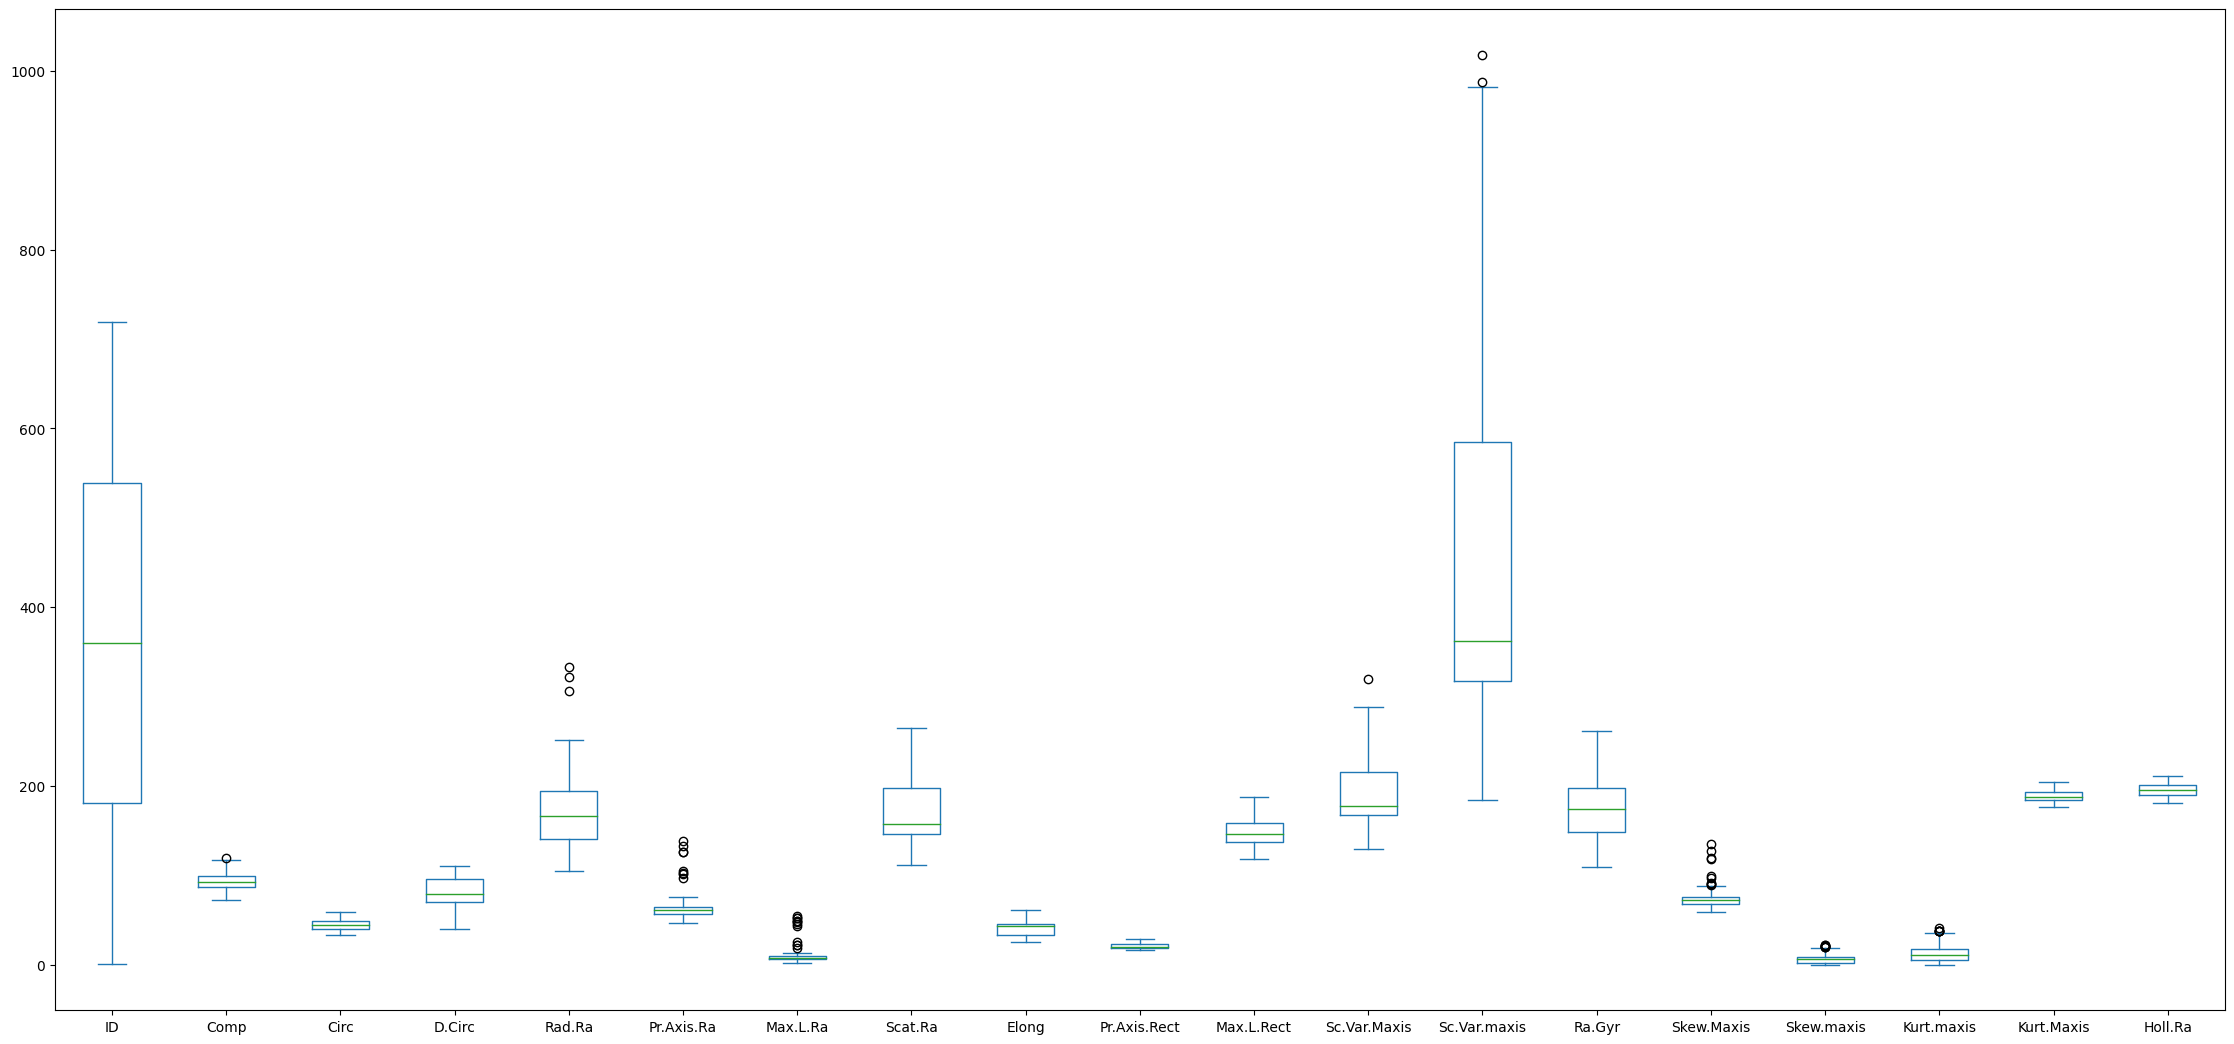

In [67]:
train.plot(kind='box',figsize=(28,13))

In [68]:
for cols in train.columns[:-1]:
    q3=train[cols].quantile(0.75)
    q1=train[cols].quantile(0.25)
    iqr=q3-q1
    high=q3+1.5*iqr
    low=q1-1.5*iqr
    # replacing all outliers from median 
    train[cols][(train[cols]<low)|(train[cols]>high)]=train[cols].median()



<AxesSubplot: >

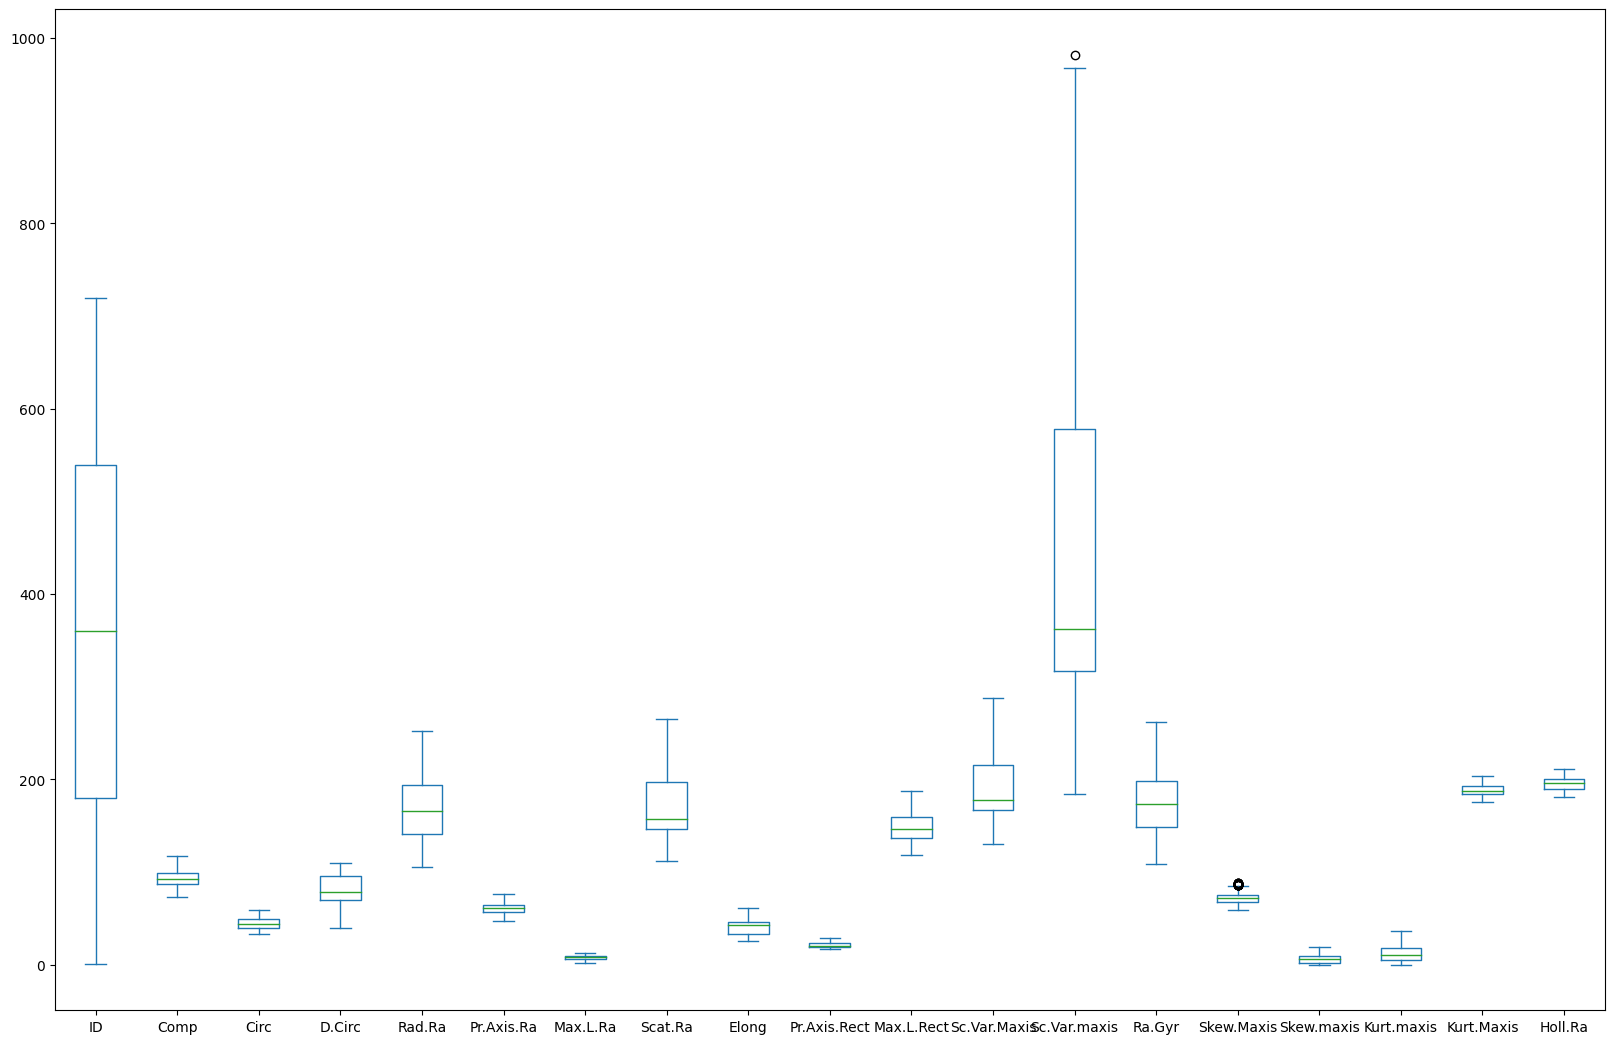

In [69]:
train.plot(kind='box',figsize=(20,13))

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'Comp'}>,
        <AxesSubplot: title={'center': 'Circ'}>,
        <AxesSubplot: title={'center': 'D.Circ'}>],
       [<AxesSubplot: title={'center': 'Rad.Ra'}>,
        <AxesSubplot: title={'center': 'Pr.Axis.Ra'}>,
        <AxesSubplot: title={'center': 'Max.L.Ra'}>,
        <AxesSubplot: title={'center': 'Scat.Ra'}>],
       [<AxesSubplot: title={'center': 'Elong'}>,
        <AxesSubplot: title={'center': 'Pr.Axis.Rect'}>,
        <AxesSubplot: title={'center': 'Max.L.Rect'}>,
        <AxesSubplot: title={'center': 'Sc.Var.Maxis'}>],
       [<AxesSubplot: title={'center': 'Sc.Var.maxis'}>,
        <AxesSubplot: title={'center': 'Ra.Gyr'}>,
        <AxesSubplot: title={'center': 'Skew.Maxis'}>,
        <AxesSubplot: title={'center': 'Skew.maxis'}>],
       [<AxesSubplot: title={'center': 'Kurt.maxis'}>,
        <AxesSubplot: title={'center': 'Kurt.Maxis'}>,
        <AxesSubplot: title={'center': 'Ho

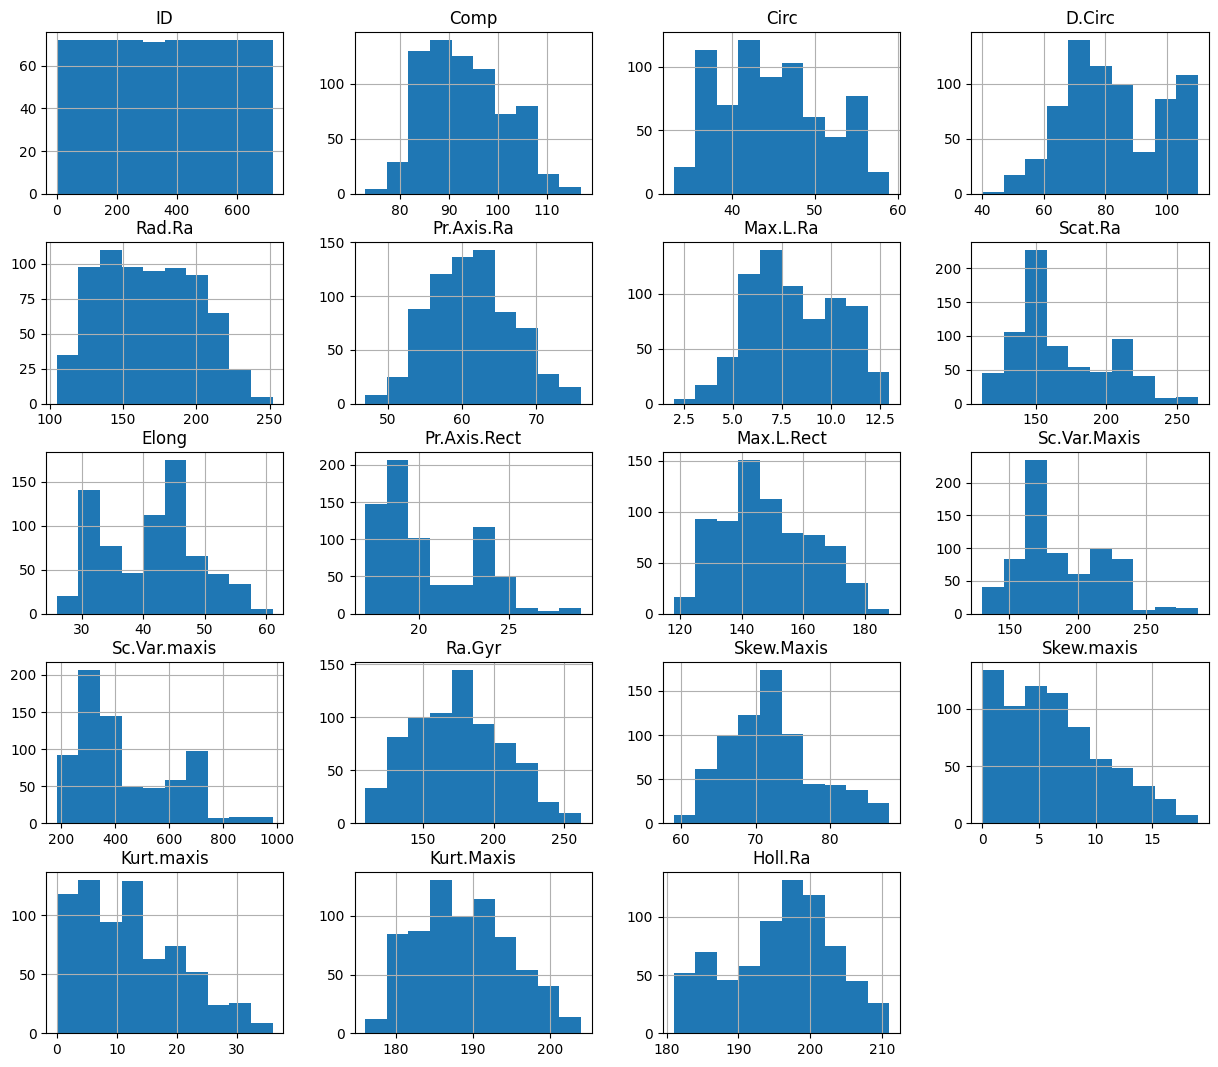

In [70]:
train.hist(figsize=(15,13))

array([[<AxesSubplot: xlabel='ID', ylabel='ID'>,
        <AxesSubplot: xlabel='Comp', ylabel='ID'>,
        <AxesSubplot: xlabel='Circ', ylabel='ID'>,
        <AxesSubplot: xlabel='D.Circ', ylabel='ID'>,
        <AxesSubplot: xlabel='Rad.Ra', ylabel='ID'>,
        <AxesSubplot: xlabel='Pr.Axis.Ra', ylabel='ID'>,
        <AxesSubplot: xlabel='Max.L.Ra', ylabel='ID'>,
        <AxesSubplot: xlabel='Scat.Ra', ylabel='ID'>,
        <AxesSubplot: xlabel='Elong', ylabel='ID'>,
        <AxesSubplot: xlabel='Pr.Axis.Rect', ylabel='ID'>,
        <AxesSubplot: xlabel='Max.L.Rect', ylabel='ID'>,
        <AxesSubplot: xlabel='Sc.Var.Maxis', ylabel='ID'>,
        <AxesSubplot: xlabel='Sc.Var.maxis', ylabel='ID'>,
        <AxesSubplot: xlabel='Ra.Gyr', ylabel='ID'>,
        <AxesSubplot: xlabel='Skew.Maxis', ylabel='ID'>,
        <AxesSubplot: xlabel='Skew.maxis', ylabel='ID'>,
        <AxesSubplot: xlabel='Kurt.maxis', ylabel='ID'>,
        <AxesSubplot: xlabel='Kurt.Maxis', ylabel='ID'>,
        <A

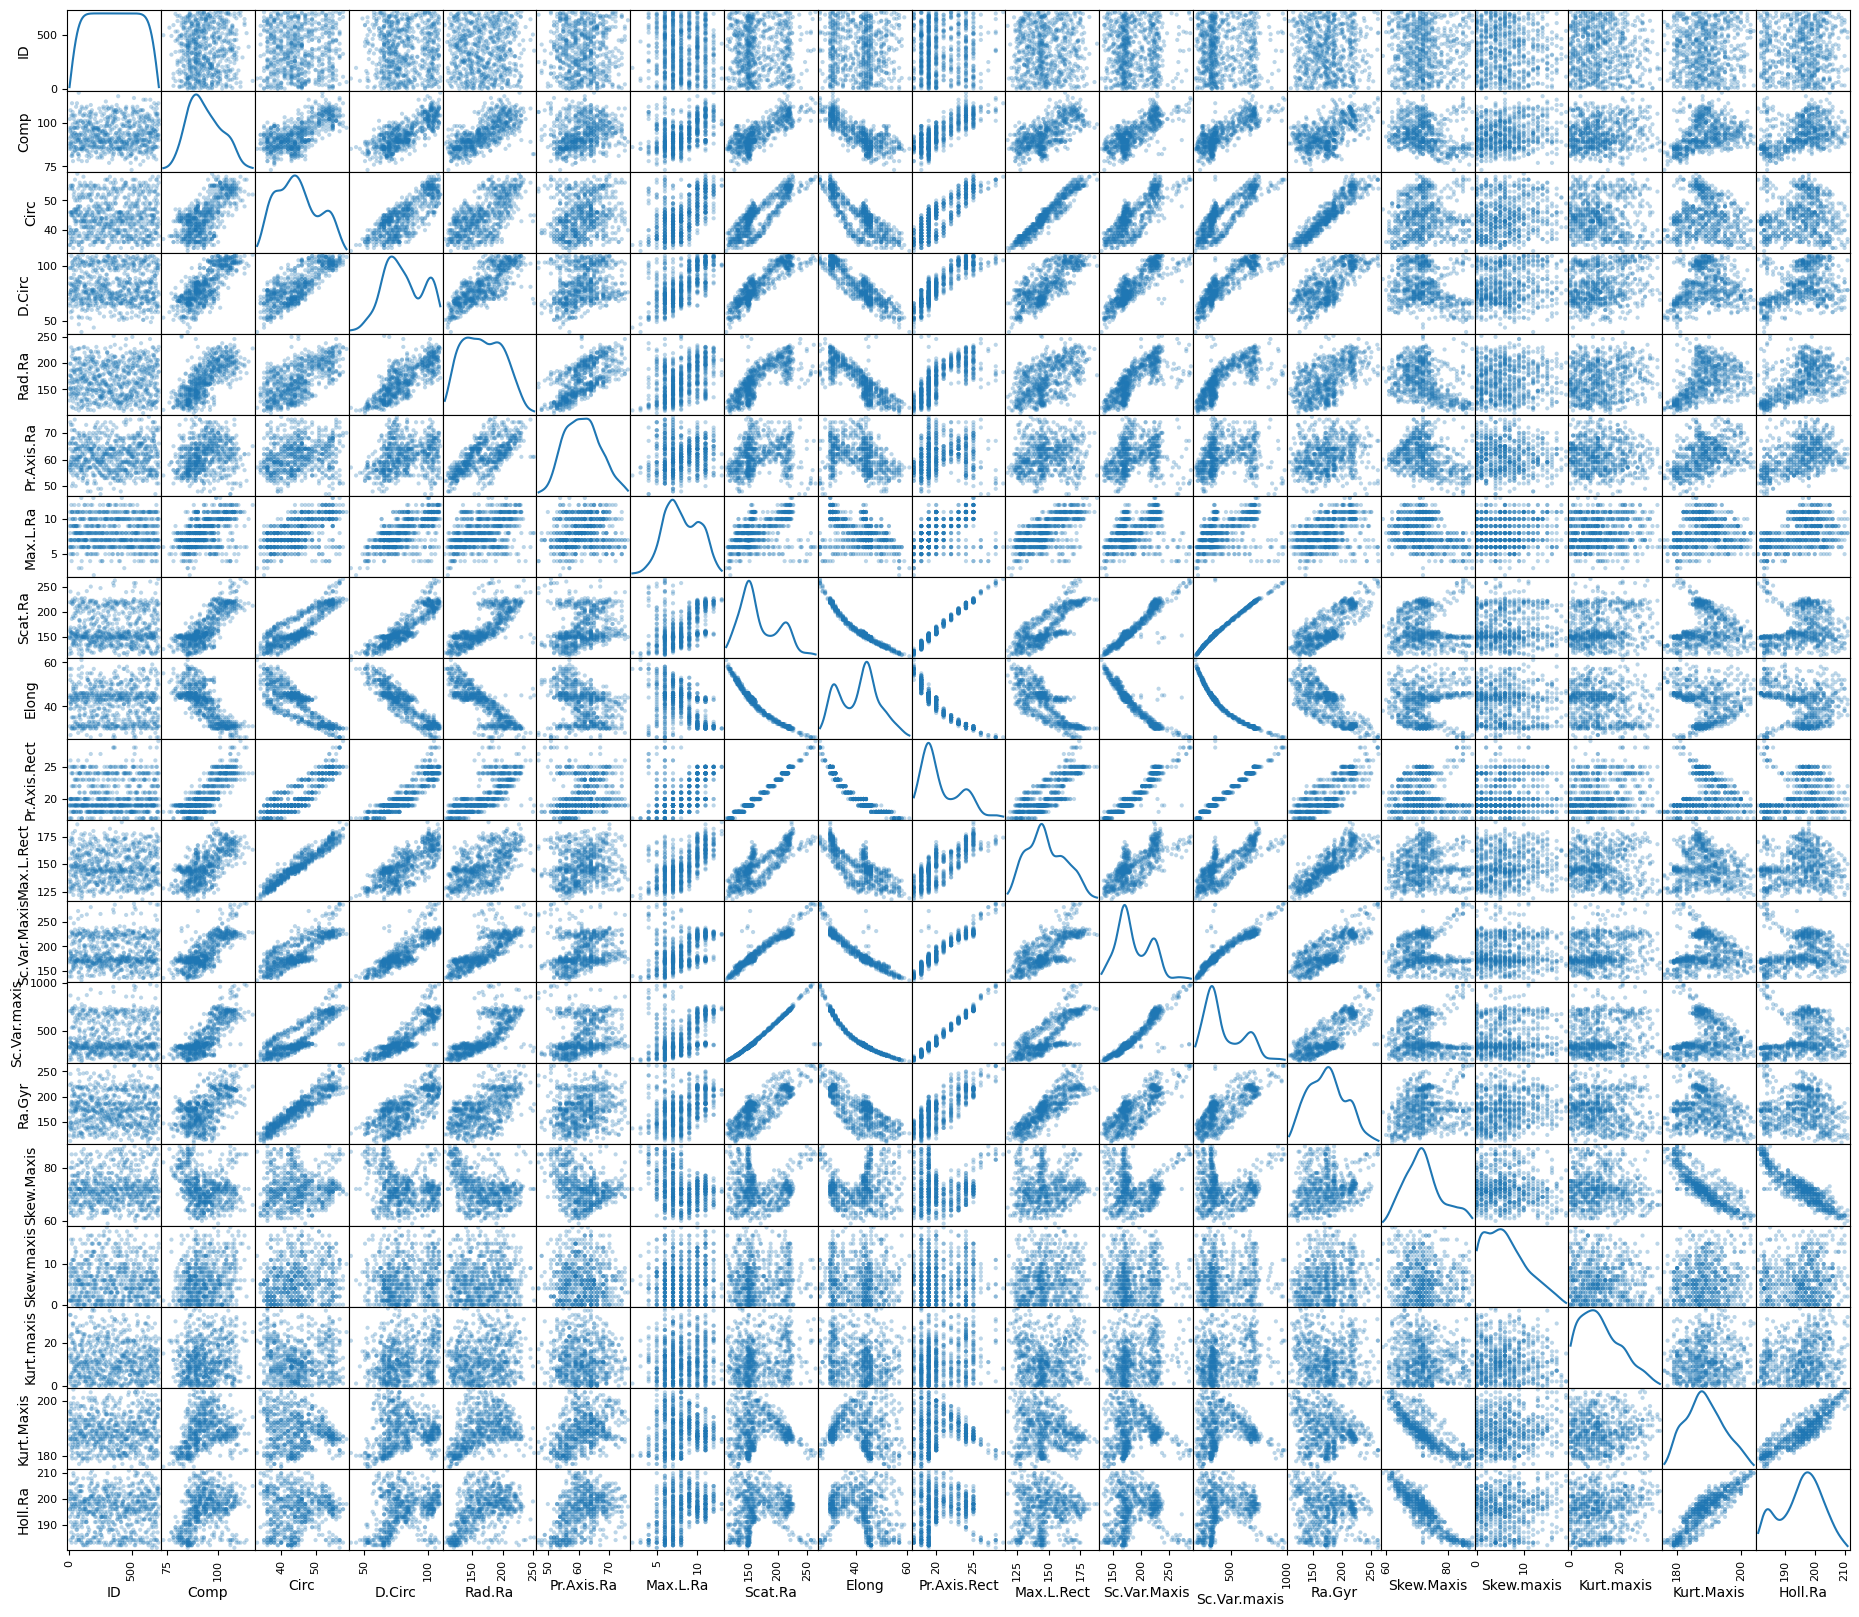

In [71]:
pd.plotting.scatter_matrix(train,alpha=0.3,figsize=(23,20),diagonal='kde')

In [72]:
# df=pd.merge(test,sample,on="ID")
# y=df["Class"]
# x=df.drop(["ID","Class"],axis=1)
# train=train.drop(["ID"],axis=1)



In [77]:
lr.fit(train,label)
sample["Class"]=lr.predict(test)
sample.to_csv("LR_kaggle_assg.csv",index=False)

C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
sv.fit(train,label)
sample["Class"]=sv.predict(test)
sample.to_csv("SVC_kaggle_assg.csv",index=False)


C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
rfc.fit(train,label)
sample["Class"]=rfc.predict(test)
sample.to_csv("RFC_kaggle_assg.csv",index=False)

C:\Users\Janak\AppData\Local\Temp\ipykernel_10712\3491389006.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train,label)
